#Auto Encoders

The idea of auto encoders is to allow a neural network to figure out how to best encode and decode certain data. The uses for autoencoders are really anything that you can think of where encoding could be useful. Some examples are in the form of compressing the number of input features and noise reduction.

Deep neural networks are often quite good at taking huge amounts of data and filtering through it to find answers and learn from data, but sometimes a model can benefit from simpler input, which is usually in the form of pruning down some of the features that arent as important, or even combining them somehow.


## General View
Firstly, we will try to understand how do these autoencoders work:

In [78]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255,

In [79]:
!nvidia-smi | grep "Tesla"

|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |


In [81]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

In [82]:
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

In [83]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

In [84]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_8 (Reshape)          (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

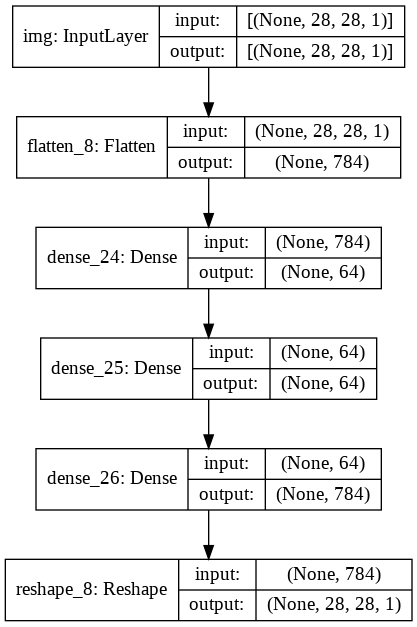

In [85]:
tf.keras.utils.plot_model(
    autoencoder,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)

In [86]:
autoencoder.compile(opt, loss='mse')

In [87]:
epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 6s 3ms/step - loss: 0.0302 - val_loss: 0.0132
INFO:tensorflow:Assets written to: models/AE-1.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0123 - val_loss: 0.0116
INFO:tensorflow:Assets written to: models/AE-2.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0113 - val_loss: 0.0111
INFO:tensorflow:Assets written to: models/AE-3.model/assets


In [88]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1) ])

In [89]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1) ])

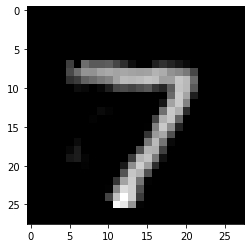

In [90]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0].reshape((28,28))  
plt.imshow(img, cmap="gray")

In [91]:
def plot_nums(num, dim_x, dim_y):
    fig, axes = plt.subplots(ncols=3, figsize=(dim_x, dim_y))
    ax1, ax2, ax3 = axes
    ax1.axis('off')
    ax1.set_title('Real Input')
    ax2.axis('off')
    ax2.set_title('Input Encoded')
    ax3.axis('off')
    ax3.set_title('Decoded Output')
    ax1.imshow(num)
    ax2.imshow(encoder.predict([num.reshape(-1, 28, 28, 1) ])[0].reshape((8,8)))
    ax3.imshow(autoencoder.predict([x_test[i].reshape(-1, 28, 28, 1) ])[0].reshape((28, 28)))
    plt.show()

# plot_nums(x_test[i])

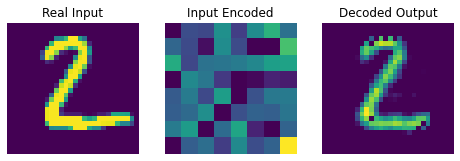

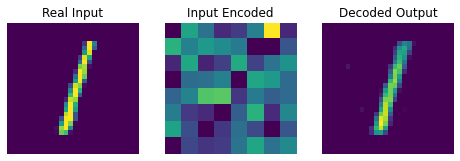

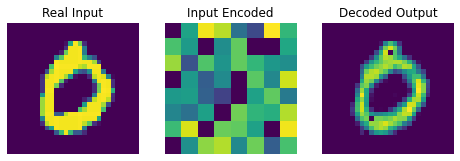

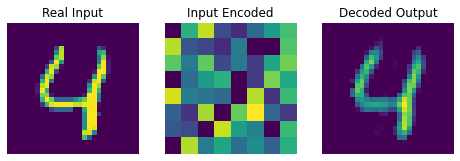

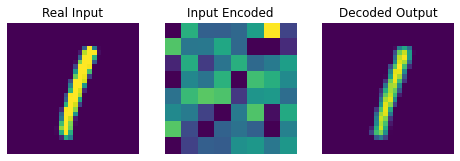

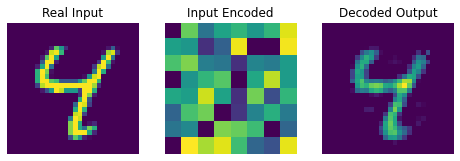

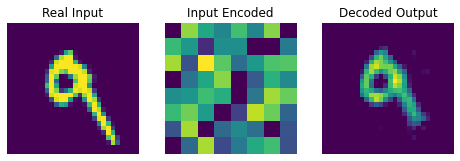

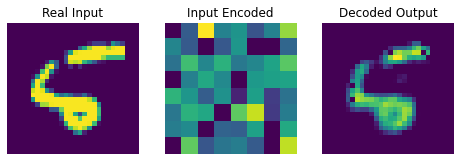

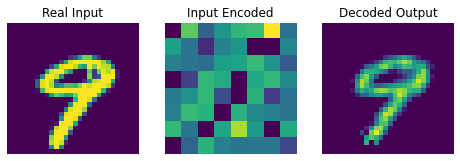

In [92]:
for i in range(1,10):
  number = x_test[i]
  plot_nums(number, 8, 8)

With more epochs, should the output be better?

In [93]:
epochs=30

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0109 - val_loss: 0.0109
INFO:tensorflow:Assets written to: models/AE-1.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0107 - val_loss: 0.0106
INFO:tensorflow:Assets written to: models/AE-2.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0106 - val_loss: 0.0106
INFO:tensorflow:Assets written to: models/AE-3.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0105 - val_loss: 0.0105
INFO:tensorflow:Assets written to: models/AE-4.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0104
INFO:tensorflow:Assets written to: models/AE-5.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0104
INFO:tensorflow:Assets written to: models/AE-6.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0103
INF

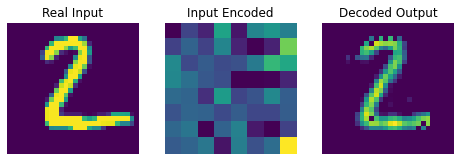

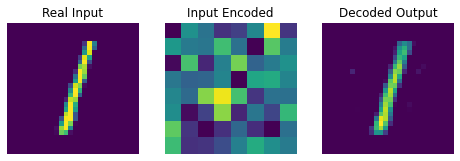

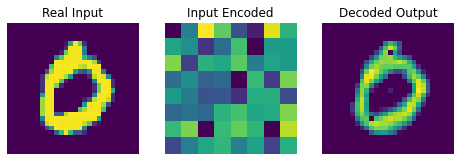

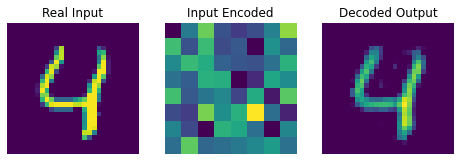

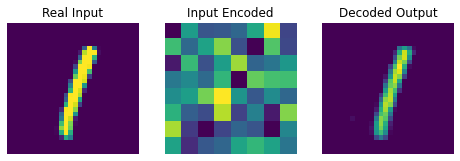

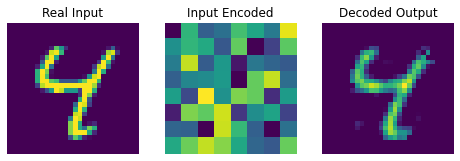

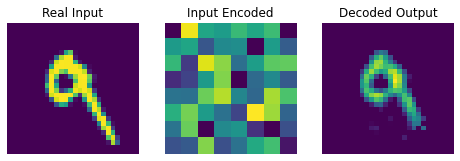

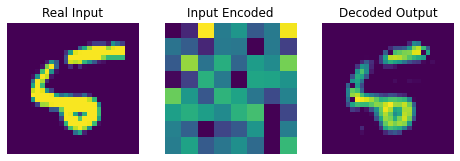

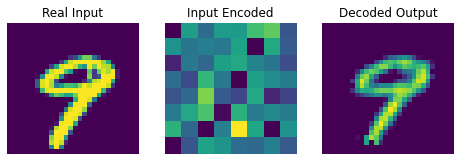

In [94]:
for i in range(1,10):
  number = x_test[i]
  plot_nums(number, 8, 8)

In [95]:
def plot_nums(num, dim_x, dim_y):
    fig, axes = plt.subplots(ncols=3, figsize=(6, 6))
    ax1, ax2, ax3 = axes
    ax1.axis('off')
    ax1.set_title('Real Input')
    ax2.axis('off')
    ax2.set_title('Input Encoded')
    ax3.axis('off')
    ax3.set_title('Decoded Output')
    ax1.imshow(num)
    ax2.imshow(encoder.predict([num.reshape(-1, 28, 28, 1) ])[0].reshape((dim_x, dim_y)))
    ax3.imshow(autoencoder.predict([x_test[i].reshape(-1, 28, 28, 1) ])[0].reshape((28, 28)))
    plt.show()

 Artificial Intelligence Compresor Level ----> 1 

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0623 - val_loss: 0.0612


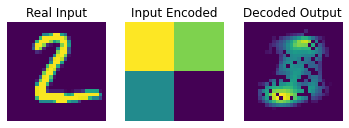

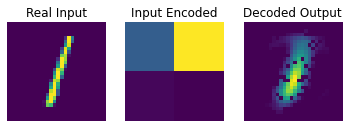

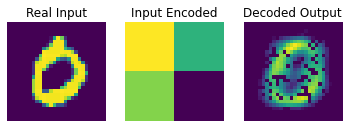

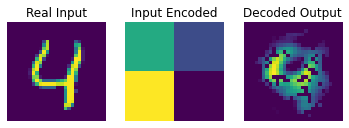

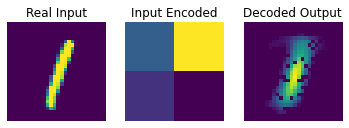

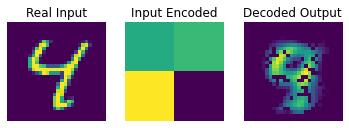

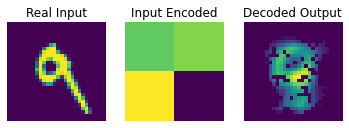

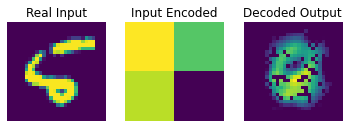

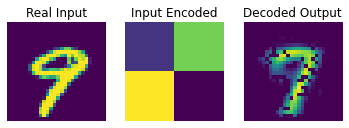

 Artificial Intelligence Compresor Level ----> 2 

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0425 - val_loss: 0.0424


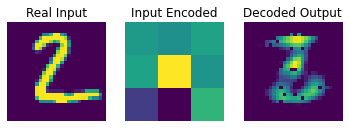

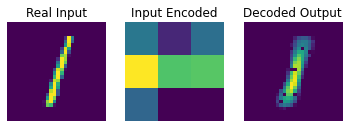

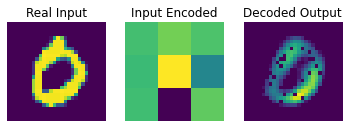

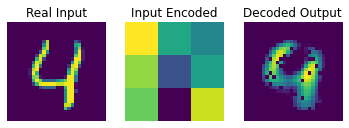

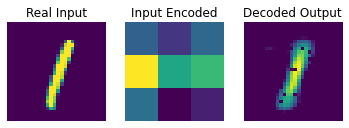

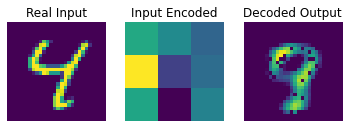

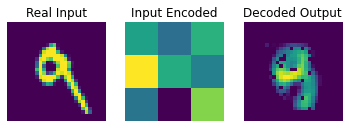

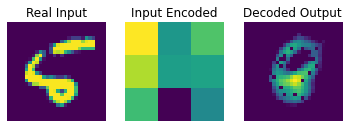

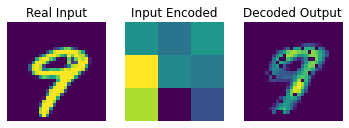

 Artificial Intelligence Compresor Level ----> 3 

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0309 - val_loss: 0.0306


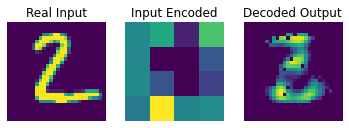

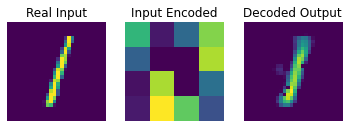

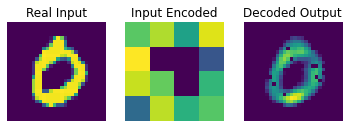

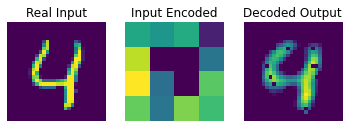

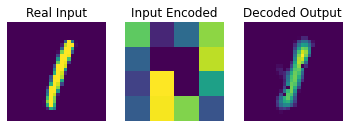

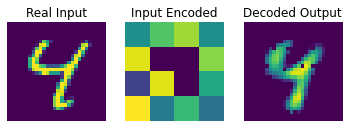

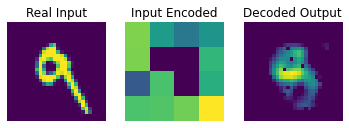

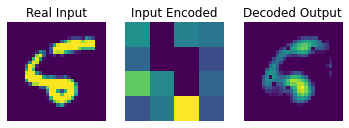

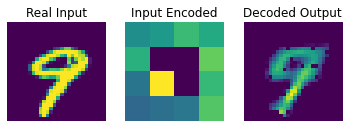

 Artificial Intelligence Compresor Level ----> 4 

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0228 - val_loss: 0.0225


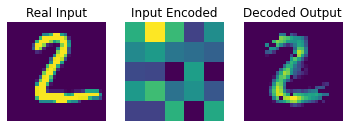

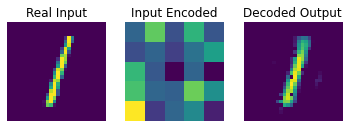

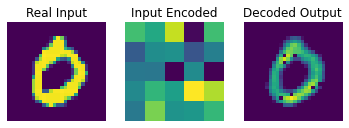

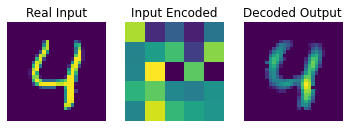

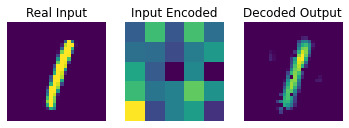

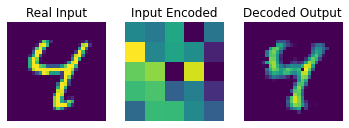

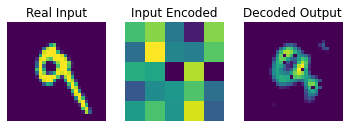

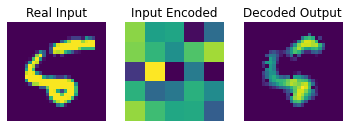

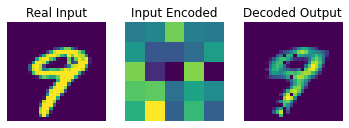

 Artificial Intelligence Compresor Level ----> 5 

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0173 - val_loss: 0.0171


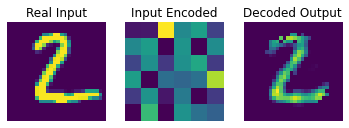

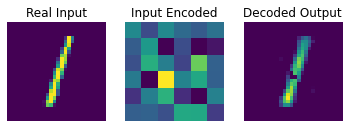

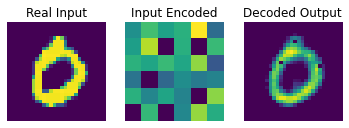

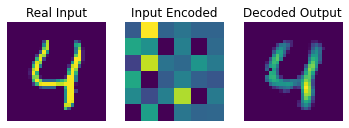

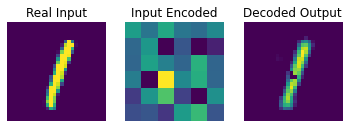

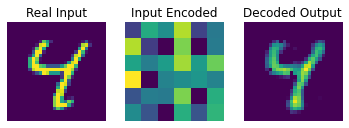

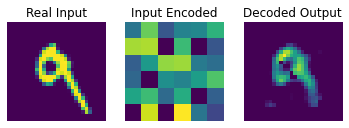

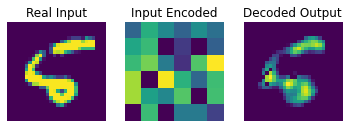

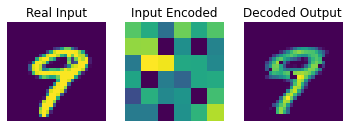

 Artificial Intelligence Compresor Level ----> 6 

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0109 - val_loss: 0.0108


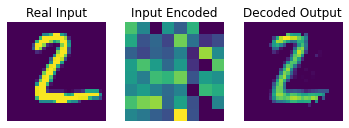

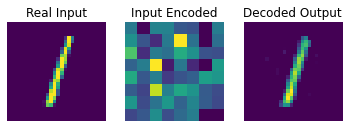

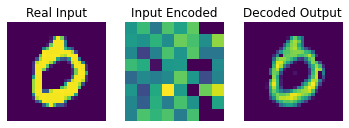

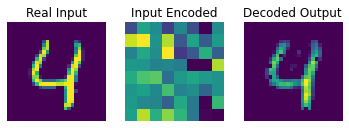

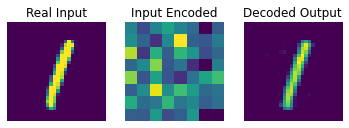

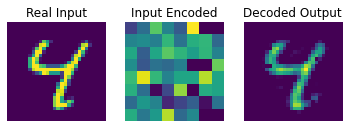

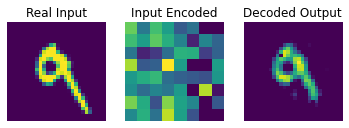

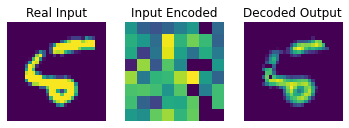

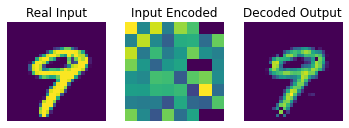

 Artificial Intelligence Compresor Level ----> 7 

1688/1688 [==============================] - 6s 3ms/step - loss: 0.0082 - val_loss: 0.0082


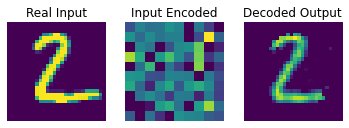

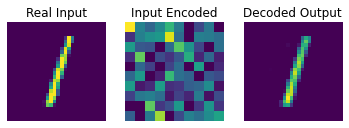

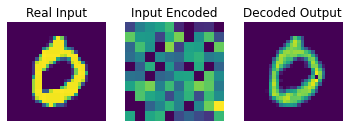

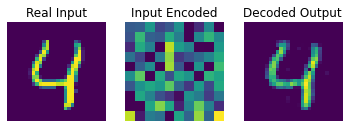

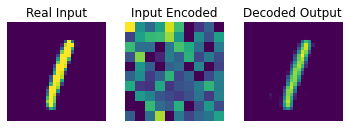

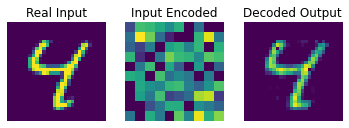

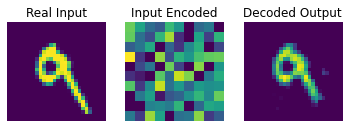

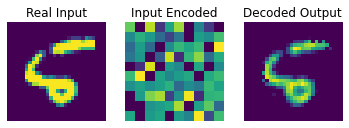

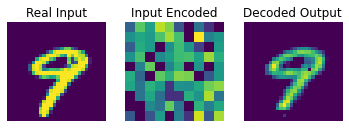

In [96]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np


(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

compression_level = [10, 8, 6, 5, 4, 3, 2][::-1]

for i, level  in  enumerate(compression_level):
  print(f" Artificial Intelligence Compresor Level ----> {i + 1}", "\n")

  encoder_input = keras.Input(shape=(28, 28, 1), name='img')
  x = keras.layers.Flatten()(encoder_input)
  encoder_output = keras.layers.Dense(level * level, activation="relu")(x)

  encoder = keras.Model(encoder_input, encoder_output, name='encoder')

  decoder_input = keras.layers.Dense(level * level, activation="relu")(encoder_output)
  x = keras.layers.Dense(784, activation="relu")(decoder_input)
  decoder_output = keras.layers.Reshape((28, 28, 1))(x)

  opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

  autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
  # autoencoder.summary()

  autoencoder.compile(opt, loss='mse')

  epochs=5

  for epoch in range(epochs):

      history = autoencoder.fit(
        x_train,
        x_train,
        epochs=1, 
        batch_size=32, validation_split=0.10
          )   
      # autoencoder.save(f"models/AE-{epoch+1}.model")

  for i in range(1,10):
    number = x_test[i]
    plot_nums(number, level, level)

We can see we have moved from a 28x28 matrix to a 3x3 and we could still be able to decode the information and understand what the input was. This represents a 98.5% of the information input has been correctly compressed.


#Noise Cleaning
Autoencoders are also helpfull in denoising images. Let us code a function to add random noise on the images. 

In [97]:
import random


def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

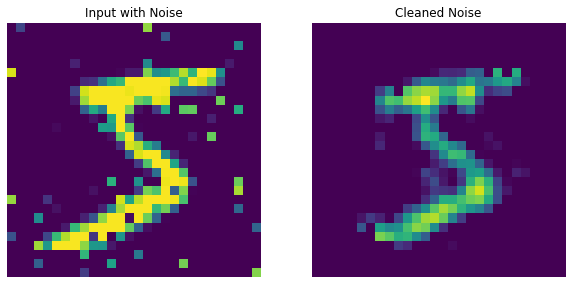

In [98]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
ax1, ax2 = axes
ax1.axis('off')
ax1.set_title('Input with Noise')
ax2.axis('off')
ax2.set_title('Cleaned Noise')
ax1.imshow(add_noise(x_train[0]))
ax2.imshow(autoencoder.predict([noisy.reshape(-1, 28, 28, 1) ])[0].reshape((28, 28)))
plt.show()

It has worked well as we can clearly see. Let us make it even more difficult now adding a thin cross on the image. To do so, we will use opencv.


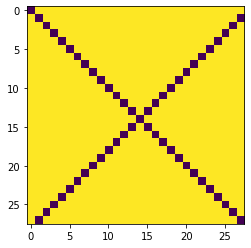

In [99]:
import cv2  # python-opencv
import numpy as np

width, height = 28, 28
x1, y1 = 0, 0
x2, y2 = 28, 28
image = np.ones((height, width)) * 255
line_thickness = 1
img = cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)
x1, y1 = 0, 28
x2, y2 = 28, 0
plt.imshow(cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness))

In [101]:
def add_cross(img):
  import cv2  # python-opencv
  import numpy as np
  width, height = 28, 28
  x1, y1 = 0, 0
  x2, y2 = 28, 28
  line_thickness = 1
  img = cv2.line(add_noise(img), (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)
  x1, y1 = 0, 28
  x2, y2 = 28, 0
  return cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)

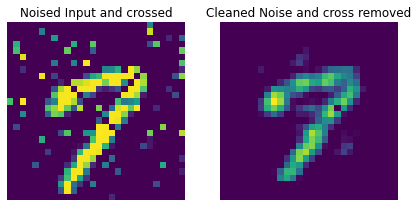

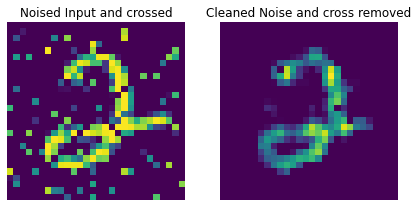

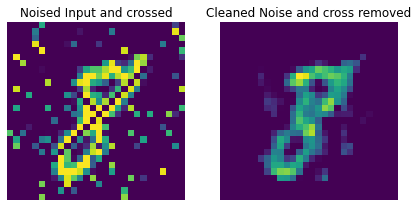

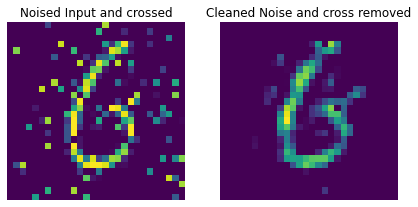

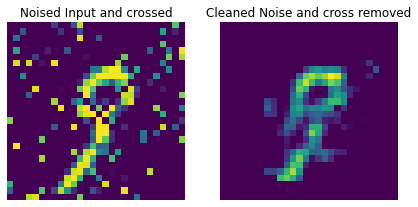

In [104]:

for i in range(15,20):
  img = add_cross(add_noise(x_train[i]))
  fig, axes = plt.subplots(ncols=2, figsize=(7, 7))
  ax1, ax2 = axes
  ax1.axis('off')
  ax1.set_title('Noised Input and crossed')
  ax2.axis('off')
  ax2.set_title('Cleaned Noise and cross removed')
  ax1.imshow(img)
  ax2.imshow(autoencoder.predict([img.reshape(-1, 28, 28, 1) ])[0].reshape((28, 28)))
  plt.show()

We see that it also deals well with the "holes" of the cross and it automatically fills them. If we use higher values for line thick it will be too difficult for the model to deal with it, but keep in mind that we will be using a line with for example 2 pixels while the lenght and the wide of the image is just 28 pixels, so this is the reason why higher values for the cross might be too difficult to deal with.

Should it work better if we train with some of these images crossed and noissed?

Let us create a new dataset for this experiment.

In [124]:
import tqdm

x_train_n, y_train_n = x_train.copy(), x_train.copy()
print(f" Original shapes for x, y {x_train_n.shape}, {y_train_n.shape}")

for i in tqdm.tqdm(range(1,20000)):
  img = x_train[i]
  y_train_n = np.vstack((y_train_n, img.reshape((1, 28, 28))))
  img_ = add_cross(add_noise(x_train[i]))
  x_train_n = np.vstack((x_train_n, img_.reshape((1, 28, 28))))

print(f" Final shapes for x, y {x_train_n.shape}, {y_train_n.shape}")

  0%|          | 1/19999 [00:00<41:16,  8.07it/s]

 Original shapes for x, y (60000, 28, 28), (60000, 28, 28)


100%|██████████| 19999/19999 [46:56<00:00,  7.10it/s]

 Final shapes for x, y (79999, 28, 28), (79999, 28, 28)


In [125]:
print(f" Original shapes for x, y {x_train_n.shape}, {y_train_n.shape}")

 Original shapes for x, y (79999, 28, 28), (79999, 28, 28)


In [126]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

autoencoder.compile(opt, loss='mse')

epochs=5

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train_n,
      y_train_n,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_56 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_18 (Reshape)         (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

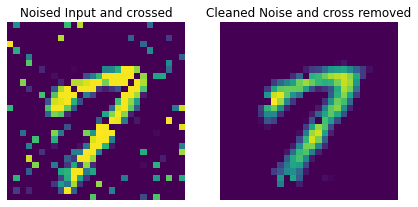

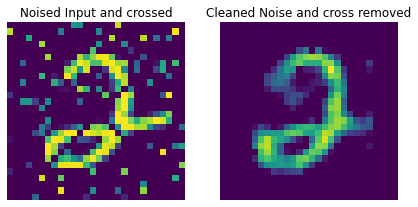

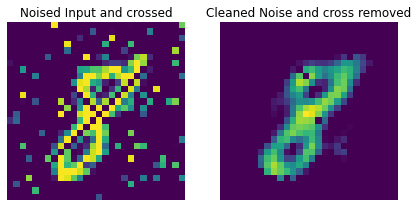

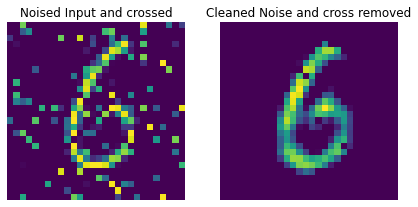

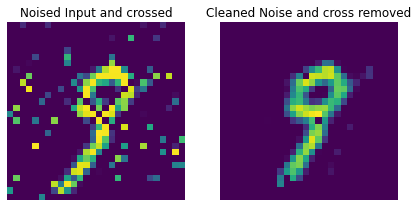

In [127]:
for i in range(15,20):
  img = add_cross(add_noise(x_train[i]))
  fig, axes = plt.subplots(ncols=2, figsize=(7, 7))
  ax1, ax2 = axes
  ax1.axis('off')
  ax1.set_title('Noised Input and crossed')
  ax2.axis('off')
  ax2.set_title('Cleaned Noise and cross removed')
  ax1.imshow(img)
  ax2.imshow(autoencoder.predict([img.reshape(-1, 28, 28, 1) ])[0].reshape((28, 28)))
  plt.show()

Indeed, it has wordked even better!

2